# Завдання на використання SQL в Python

1.Встановіть MySQL локально. Для встановлення скористайтесь [інструкціями](https://dev.mysql.com/doc/refman/8.0/en/installing.html). Для встановлення на Windows може бути також корисним це [відео](https://youtu.be/GIRcpjg-3Eg).
Після встановлення MySQL вставте нижче в клітинку типу Markdown скріншот: 
- якщо у Вас Windows - з MySQL Command Line Client. Має бути щось таке:

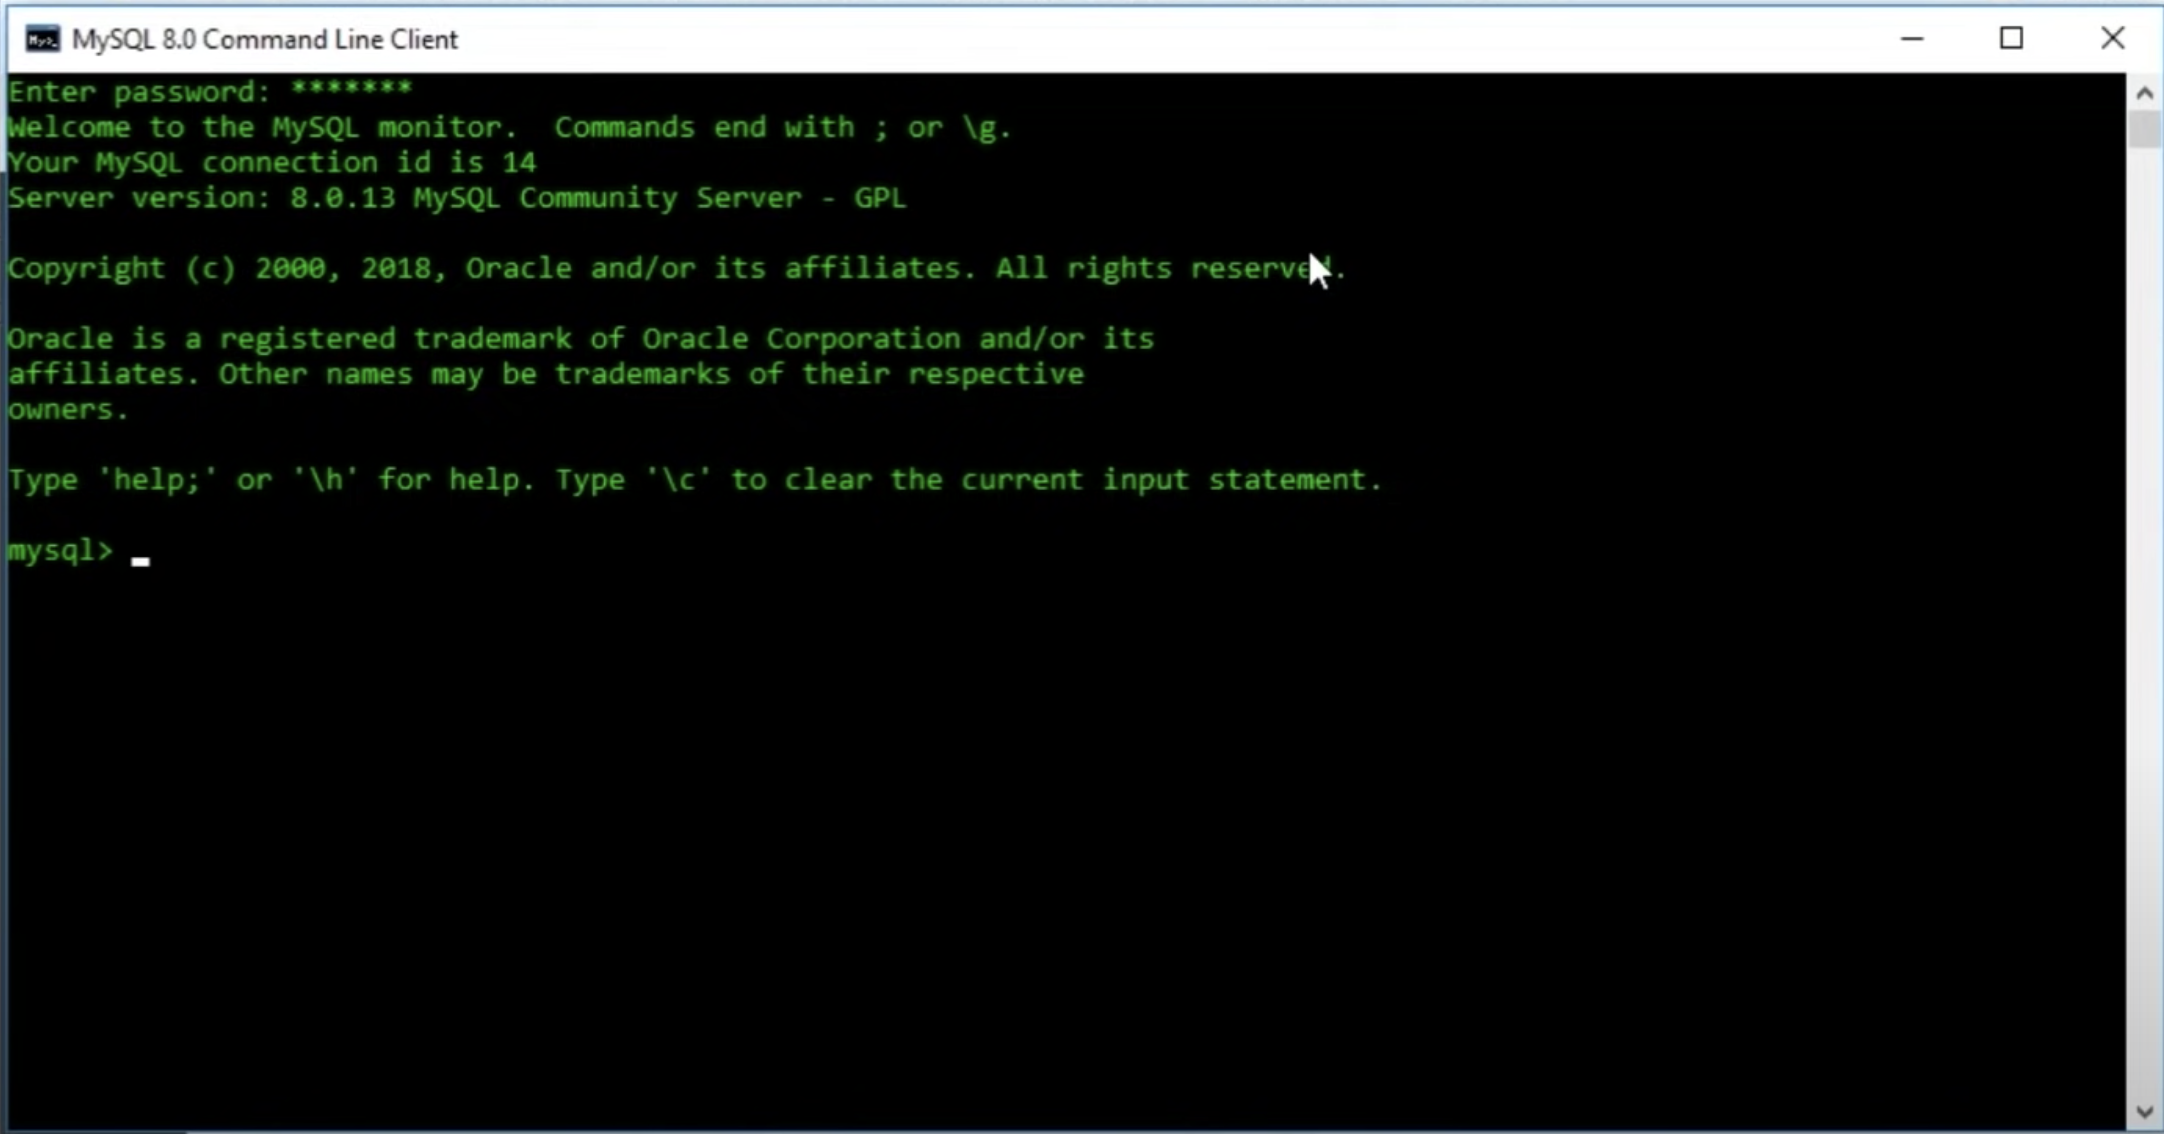

- якщо у Вас Linux/Mac - вікна термінала, де виконано команду ```mysql --version```

**ЯК ВСТАВИТИ СКРІНШОТ в Jupyter Notebook** :
1. Створіть нову Markdown клітинку
2. В новоствореній клітинці обираєте в меню Jupyter Notebook Edit -> Insert Image
3. Обираєте картинку 
4. В клітинці має зʼявитись текст, який містить картинку. Запустіть клітинку.

Або можна просто перетягнути картинку в Markdown клітинку.

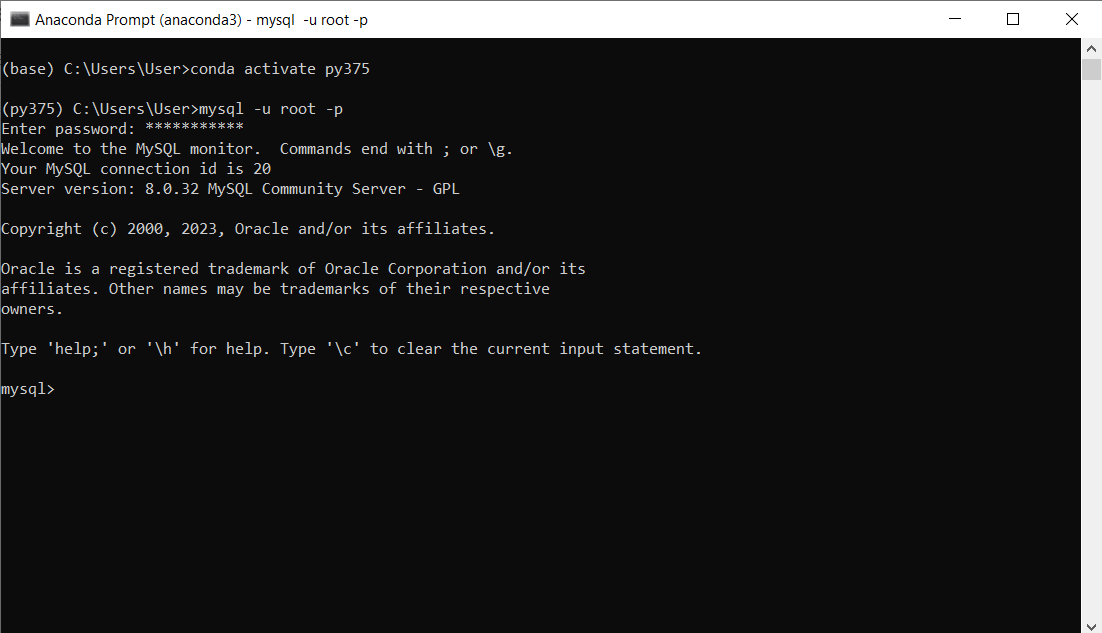

2.Завантажте та встановіть локально базу Employees. 

Репозиторій з дампами цієї бази: https://github.com/datacharmer/test_db  
Структура бази: https://dev.mysql.com/doc/employee/en/sakila-structure.html  

Щоб створити локально базу employees - в **терміналі**  
1.клонуємо репозиторій `git clone https://github.com/datacharmer/test_db.git` (можна також скачати репозиторій як архів і розархівувати - немає різниці, головне - встановити базу).  
2.в папці репозиторію `test_db` запускаємо команду `mysql -u root -p < employees.sql`    

Після цього в терміналі має надрукуватись щось таке - це означає, що всі таблиці успішно завантажились:

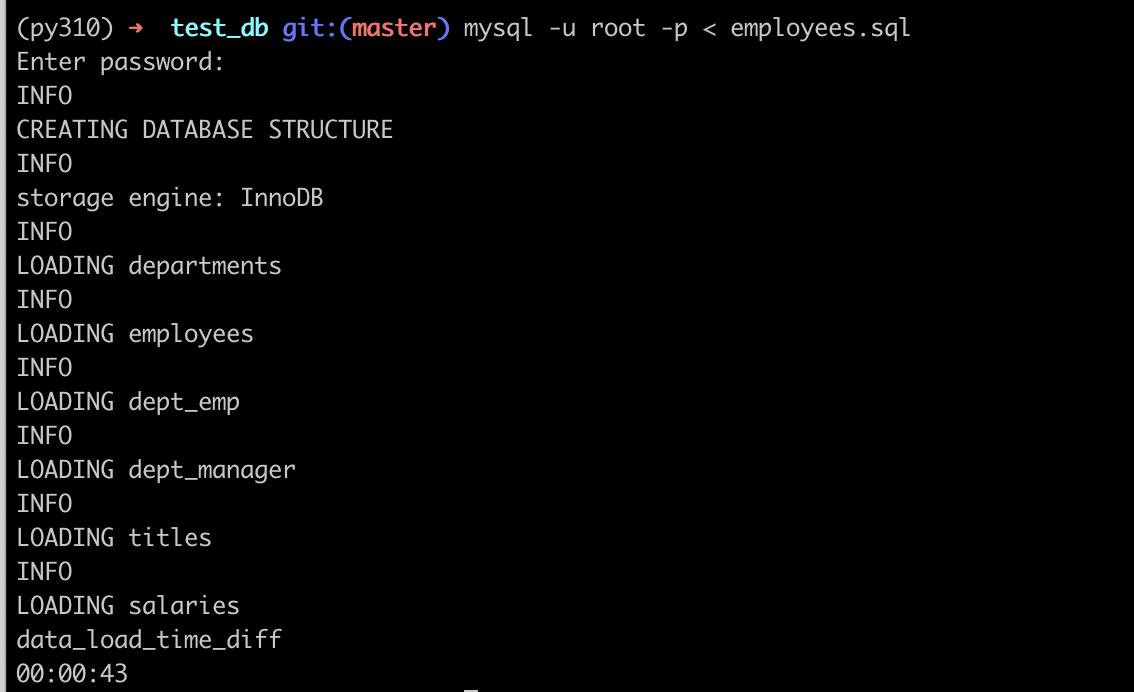

Після успішного встановлення бази, зайдіть в MySQL з консолі, виконайте наступну команду і вставте скріншот терміналу з цією командою та результатом її виконання:

`select * from employees.employees limit 5;`

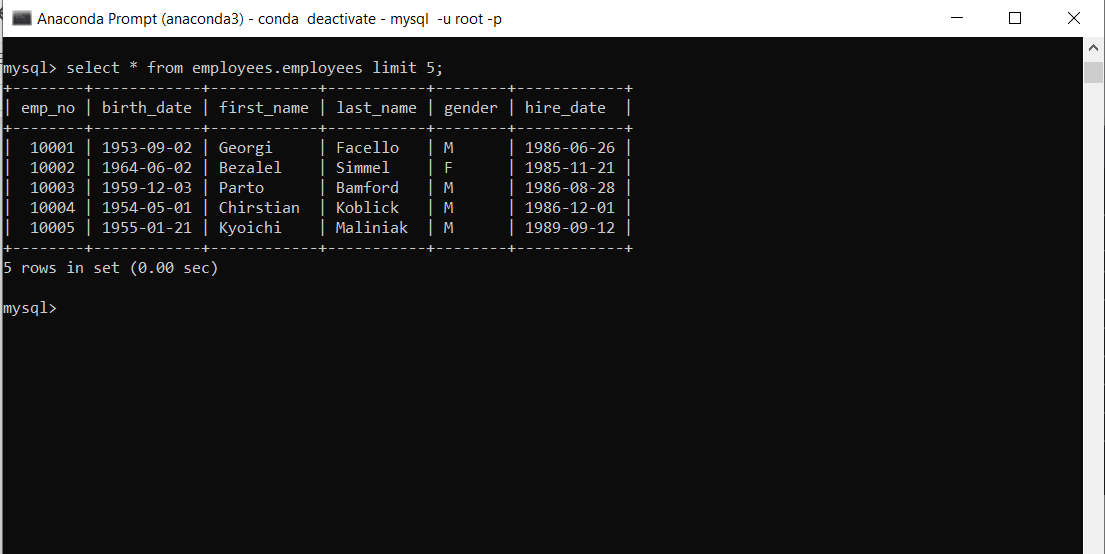

Очікуваний результат:

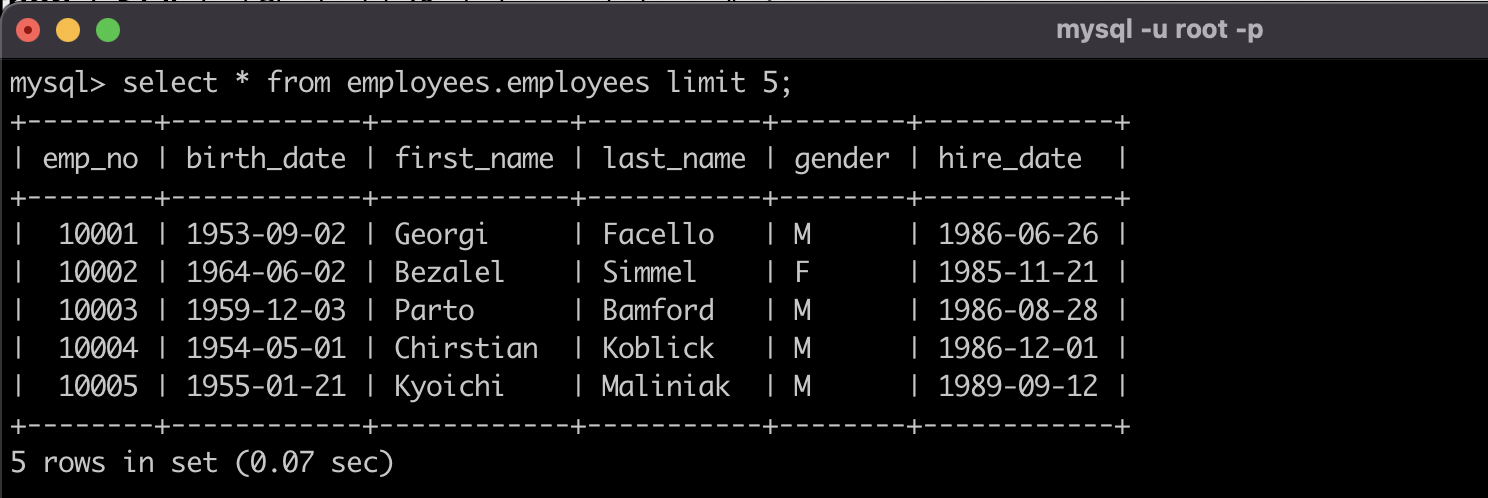

3.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector

In [3]:
con = mysql.connector.connect(user='root', password='Ktyf_324598',
                              host='127.0.0.1',
                              database='employees')

4.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [4]:
cursor = con.cursor()

In [5]:
sql = """
SELECT MAX(hire_date), MIN(hire_date) 
FROM employees
"""

In [6]:
cursor.execute(sql)

In [7]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

5.Виведіть кількість співробітників за роком, в який вони були найняті (`hire_date`) використовуючи `pandas.read_sql`. Запишіть результат в змінну `df` та виведіть значення змінної на екран.

In [8]:
import pandas as pd

In [9]:
sql = """
SELECT YEAR(hire_date), COUNT(emp_no) AS quantity_emp 
FROM employees
GROUP BY YEAR(hire_date)
ORDER BY YEAR(hire_date)
"""

In [10]:
df = pd.read_sql(sql, con, columns = ['hire_year', 'quantity_emp'])

In [11]:
df

,YEAR(hire_date),quantity_emp
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

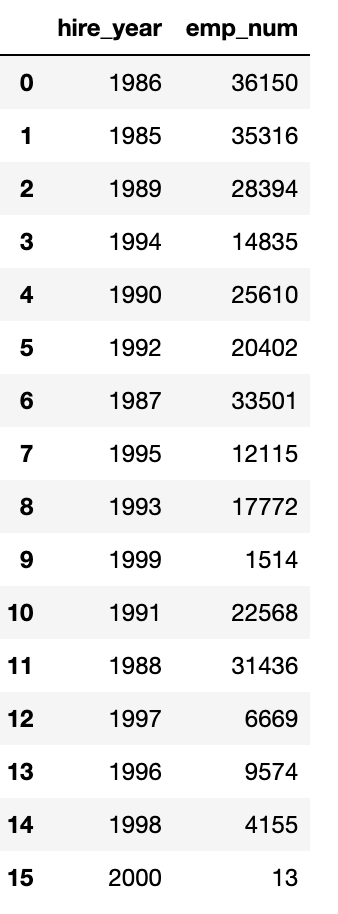

6.Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [12]:
import matplotlib.pyplot as plt

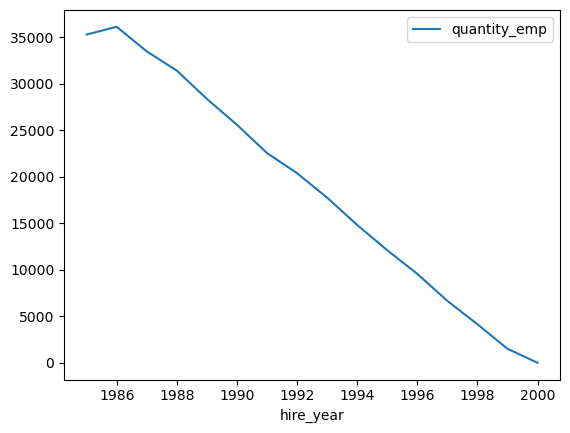

In [13]:
df.plot(x = 'YEAR(hire_date)', y = 'quantity_emp')
plt.xlabel('hire_year');

Очікуваний результат:

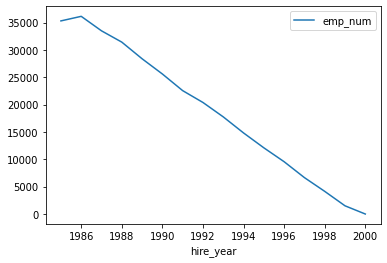

7.З допомогою SQL для позиції Engineer знайдіть кількість років перебування на позиції. Позиція зберігається в колонці title в таблиці titles. Кількість років перебування на позиції можна отримати наприклад з використанням функції timestampdiff. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну df_years та виведіть на екран.

In [14]:
sql = """
SELECT TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration, from_date, to_date
FROM titles
WHERE title = 'Engineer'AND to_date <> '9999-01-01'
"""

In [15]:
df_years = pd.read_sql(sql, con)

In [16]:
df_years

,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


Очікуваний результат:

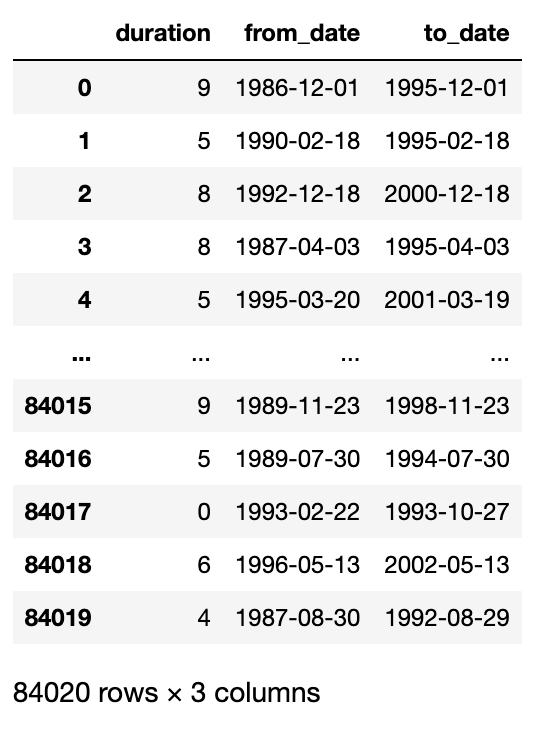

8.Використовуючи дані в df_years побудуйте гістограму кількості років, протягом яких люди з назвою позиції Engineer перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

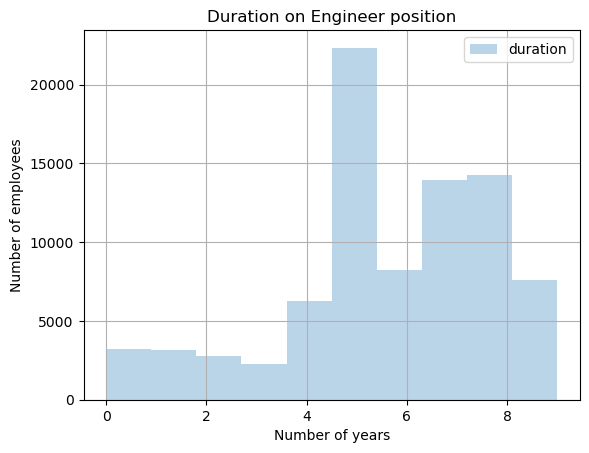

In [17]:
df_years.plot.hist(bins = 10, alpha = 0.3, title = 'Duration on Engineer position', grid = True)
plt.xlabel('Number of years')
plt.ylabel('Number of employees');

Очікуваний результат:

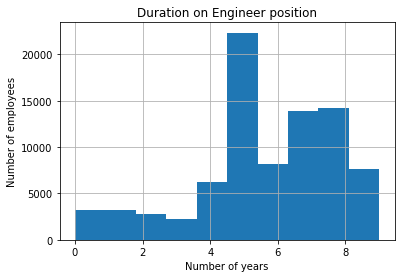

# Вітаю, Ви завершили передостаннє домашнє завдання! Лишилось ще одне і фінальний проєкт. Keep going! 